In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [ ]:
def divider(req_name):
  """
    Display the Divider line
  """
  print("*" * 10, req_name, "*" * 10)

In [ ]:
def shortest_path(G, x, y):
    """
      Returns shortest path weight from X to Y in G
    """
    return nx.shortest_path_length(G, x, y, method='dijkstra',weight='weight')

In [ ]:
def display_graph(G):
  """
    Display's the Graph G
  """
  links = [(u, v) for (u, v, d) in G.edges(data=True)]
  plt.figure(figsize=(6, 6) if(len(G.nodes) <= 10) else (20, 20))
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')
  nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', linewidths=0.25)
  nx.draw_networkx_edges(G, pos, edgelist=links, width=4)
  nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
  edge_labels = nx.get_edge_attributes(G, 'weight','trips')
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  plt.show()

In [ ]:
def get_random_src_and_dest(N):
  """
    Returns N1 and N2, Two random nodes in a Graph with Total Nodes N
  """
  n1, n2 = random.choices(list(range(1, N)), k=2)
  return n1, n2

In [ ]:
def distance(G, x, y, f = 0.6):
    """
      Returns the Distance between X and Y
    """
    return shortest_path(G, x, y) * f

In [ ]:
def neighbors(n, G):
    """
      Returns the neighbors of node N in Graph G
    """
    return G.neighbors(n)

In [ ]:
def neighbor_distance(x, y, G, trips):
    """
      Returns the sum of maximum of the neighbr distances from X/Y
    """
    xn, yn, xy_distance, yx_distance = [0], [0], distance(G, x, y), distance(G, y, x)
    max_exp, min_exp = [], []
    for nX in neighbors(x, G):
        t_d = (shortest_path(G, y, nX) - yx_distance - shortest_path(G, x, nX)) * (trips[y][nX] + trips[nX][y])
        xn.append(t_d)
        max_exp.append([f"SP({y}, {nX}) - {yx_distance} - D({x}, {nX})) * (NT[{y}][{nX}, NT[{nX}][{y}])", f"{shortest_path(G, y, nX)} - {yx_distance} - {shortest_path(G, x, nX)}) * ({trips[y][nX]} + {trips[nX][y]})"])
    for nY in neighbors(y, G):
        t_d = (shortest_path(G, x, nY) - xy_distance - shortest_path(G, y, nY)) * (trips[x][nY] + trips[nY][x])
        min_exp.append([f"SP({x}, {nY}) - {xy_distance} - D({y}, {nY})) * (NT[{x}][{nY}], NT[{nY}][{x}])", f"{shortest_path(G, x, nY)} - {xy_distance} - {shortest_path(G, y, nY)}) * ({trips[x][nY]} + {trips[nY][x]})"])
        yn.append(t_d)

    """ Generates the expressions for verification purpose
    print(f"= max({', '.join([i[0] for i in max_exp])}) + max({', '.join([i[0] for i in min_exp])})")
    print(f"= max({', '.join([i[1] for i in max_exp])}) + max({', '.join([i[1] for i in min_exp])})")
    print(f"= {max(xn)} + {max(yn)}")
    print(f"= {max(xn) + max(yn)}")"""
    return max(xn) + max(yn)

In [ ]:
def benefit(x, y, f, G, trips):
    """
      Returns the Benefit of X to Y
    """
    b = (shortest_path(G, x, y) - distance(G, x, y, f)) * (trips[x][y] + trips[y][x])
    b += neighbor_distance(x, y, G, trips)
    return b

In [ ]:
def simulate_traffic(G, n, t):
    """
      Simulates the Traffic and returns the generated trips
    """
    trips = [[0] * n] * n
    total_ticks = 60 * 60 * 10
    for tick in range(total_ticks):
        for trip in range(t):
            source, destination = get_random_src_and_dest(n)
            sp = nx.shortest_path(G, source, destination)
            for x, y in zip(sp[:-1], sp[1:]):
                trips[x][y] = trips[x][y] + 1
    return trips

In [ ]:
def get_roads_to_build(G):
  """
    Returns the list of roads to build
  """
  return list(nx.non_edges(G))

In [ ]:
def build_roads(n, k, f, G, trips):
    """
      Recommend Builds the roads of given Budget K
    """
    benefits = {pair : 0 for pair in get_roads_to_build(G)}
    for road in range(k):
        print("=" * 25, f"Recommendation - {road + 1}", sep = "\n")
        for x, y in benefits:
            benefits[(x, y)] = round(abs(benefit(x, y, f, G, trips)), 2)
        benefits = dict(sorted(benefits.items(), key = lambda benefit : benefit[1], reverse = True))
        print(benefits)
        u, v = list(benefits.keys())[0]
        G.add_edge(u, v, weight = distance(G, u, v), color = 'g')
        print(f"The Recommended road is from {u} to {v}")
        benefits.pop((u, v), None)
        display_graph(G)

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


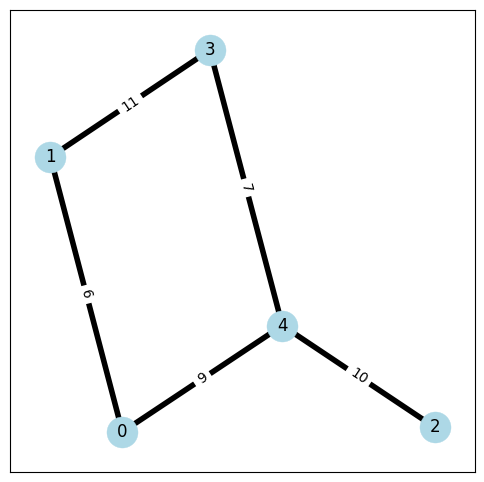

In [ ]:
# Graph creation for R2
G=nx.Graph()
G.add_edges_from([(0,1, {'weight': 6}), (0, 4, {'weight': 9}), (1, 3,{'weight': 11}), (2,4, {'weight': 10}), (3,4, {'weight': 7})])
display_graph(G)

********** R2 **********
Recommendation - 1
{(2, 3): 38.6, (0, 2): 38.0, (1, 4): 36.0, (1, 2): 30.0, (0, 3): 12.8}
The Recommended road is from 2 to 3


<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


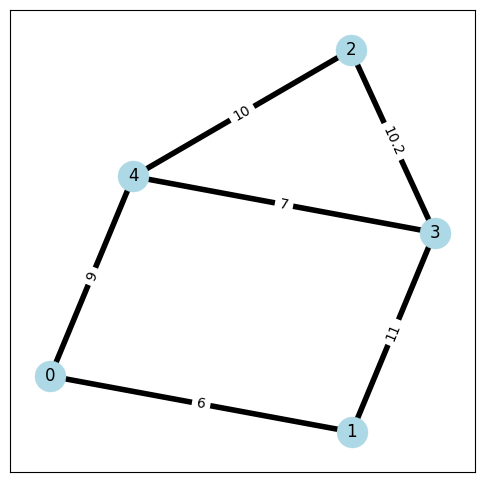

Recommendation - 2
{(0, 2): 26.6, (1, 2): 26.0, (1, 4): 24.6, (0, 3): 12.8}
The Recommended road is from 0 to 2


<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


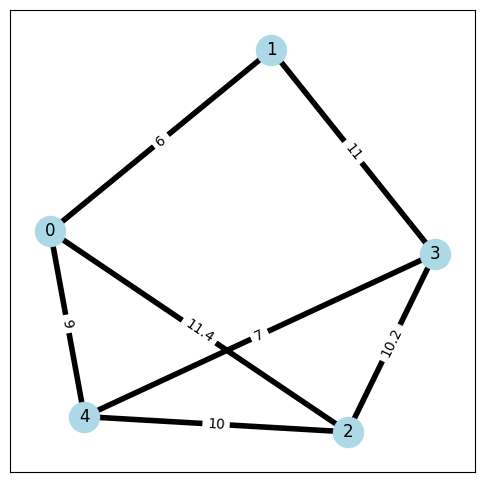

In [ ]:
# Trips mentioned as per Tutorial 2
trips = [[0, 0, 1, 1, 0],
         [0, 0, 1, 0, 1],
         [1, 2, 0, 3, 0],
         [1, 0, 1, 0, 0],
         [0, 2, 0, 0, 0]]

# R2 - The Roads recommended for Budget K = 2
divider("R2")
k, f = 2, 0.6
build_roads(5, k, f, G, trips)

In [ ]:
def generate_random_node(N, connectivity):

  E = int((N * (N - 1) / 2) * connectivity)
  G = nx.connected_watts_strogatz_graph(N, k=4, p=connectivity)
  for edge in G.edges():
      G.edges[edge]['weight'] = round(random.uniform(5, 25), 2)
  return G

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


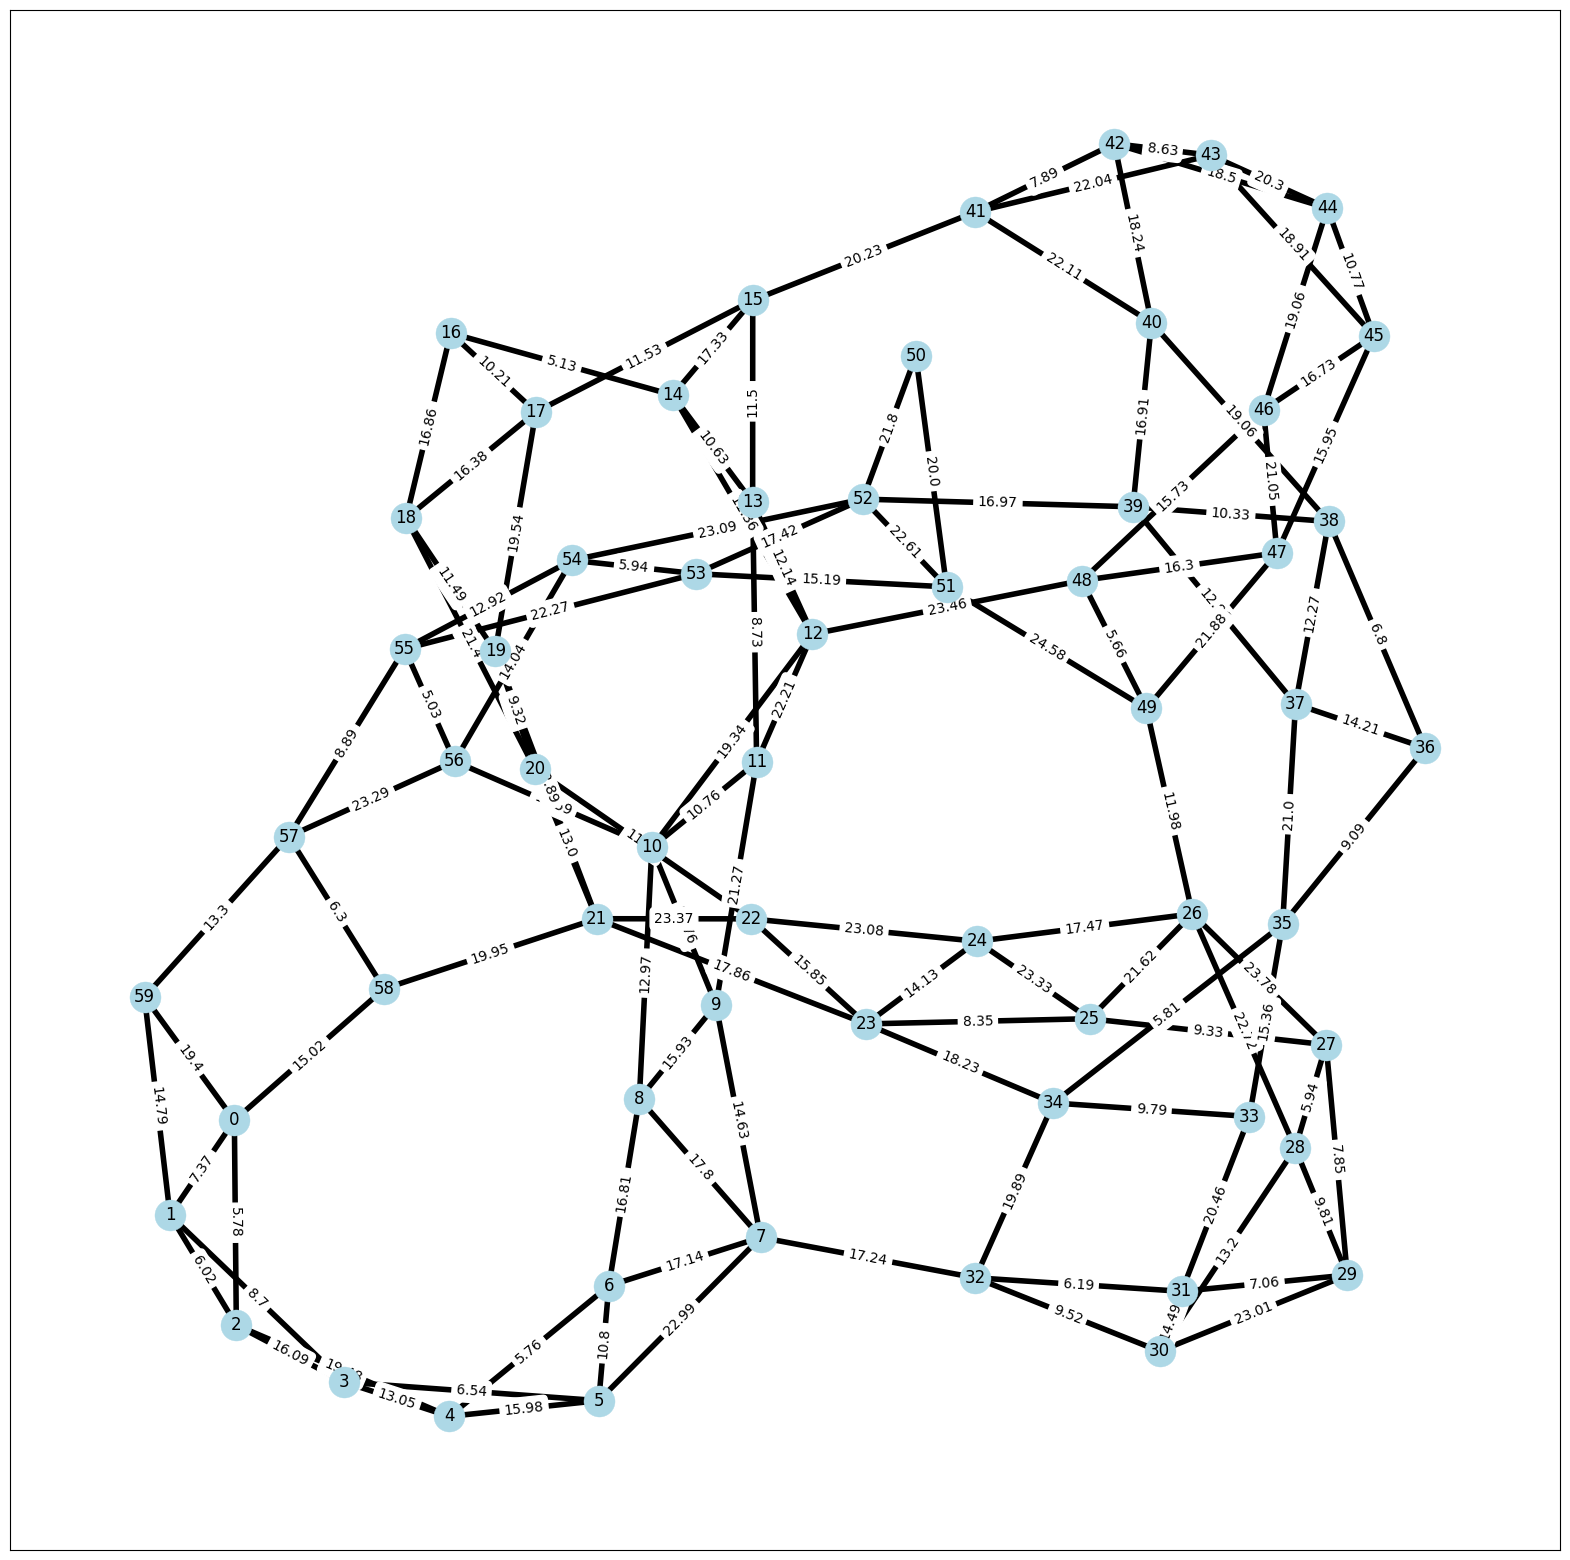

[[169919, 126371, 111949, 132867, 111440, 214695, 171188, 499018, 252421, 246994, 501532, 215519, 499743, 203099, 194088, 380112, 128552, 268843, 116818, 265635, 114751, 502364, 138672, 458502, 182965, 157668, 483956, 96353, 205228, 83537, 180184, 106696, 472048, 114147, 489063, 323459, 90101, 239037, 140677, 362392, 312179, 326088, 145908, 123065, 115428, 143837, 164393, 213496, 391099, 572323, 59798, 294802, 360094, 172254, 233798, 158411, 374251, 319727, 324889, 150334], [169919, 126371, 111949, 132867, 111440, 214695, 171188, 499018, 252421, 246994, 501532, 215519, 499743, 203099, 194088, 380112, 128552, 268843, 116818, 265635, 114751, 502364, 138672, 458502, 182965, 157668, 483956, 96353, 205228, 83537, 180184, 106696, 472048, 114147, 489063, 323459, 90101, 239037, 140677, 362392, 312179, 326088, 145908, 123065, 115428, 143837, 164393, 213496, 391099, 572323, 59798, 294802, 360094, 172254, 233798, 158411, 374251, 319727, 324889, 150334], [169919, 126371, 111949, 132867, 111440, 21

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


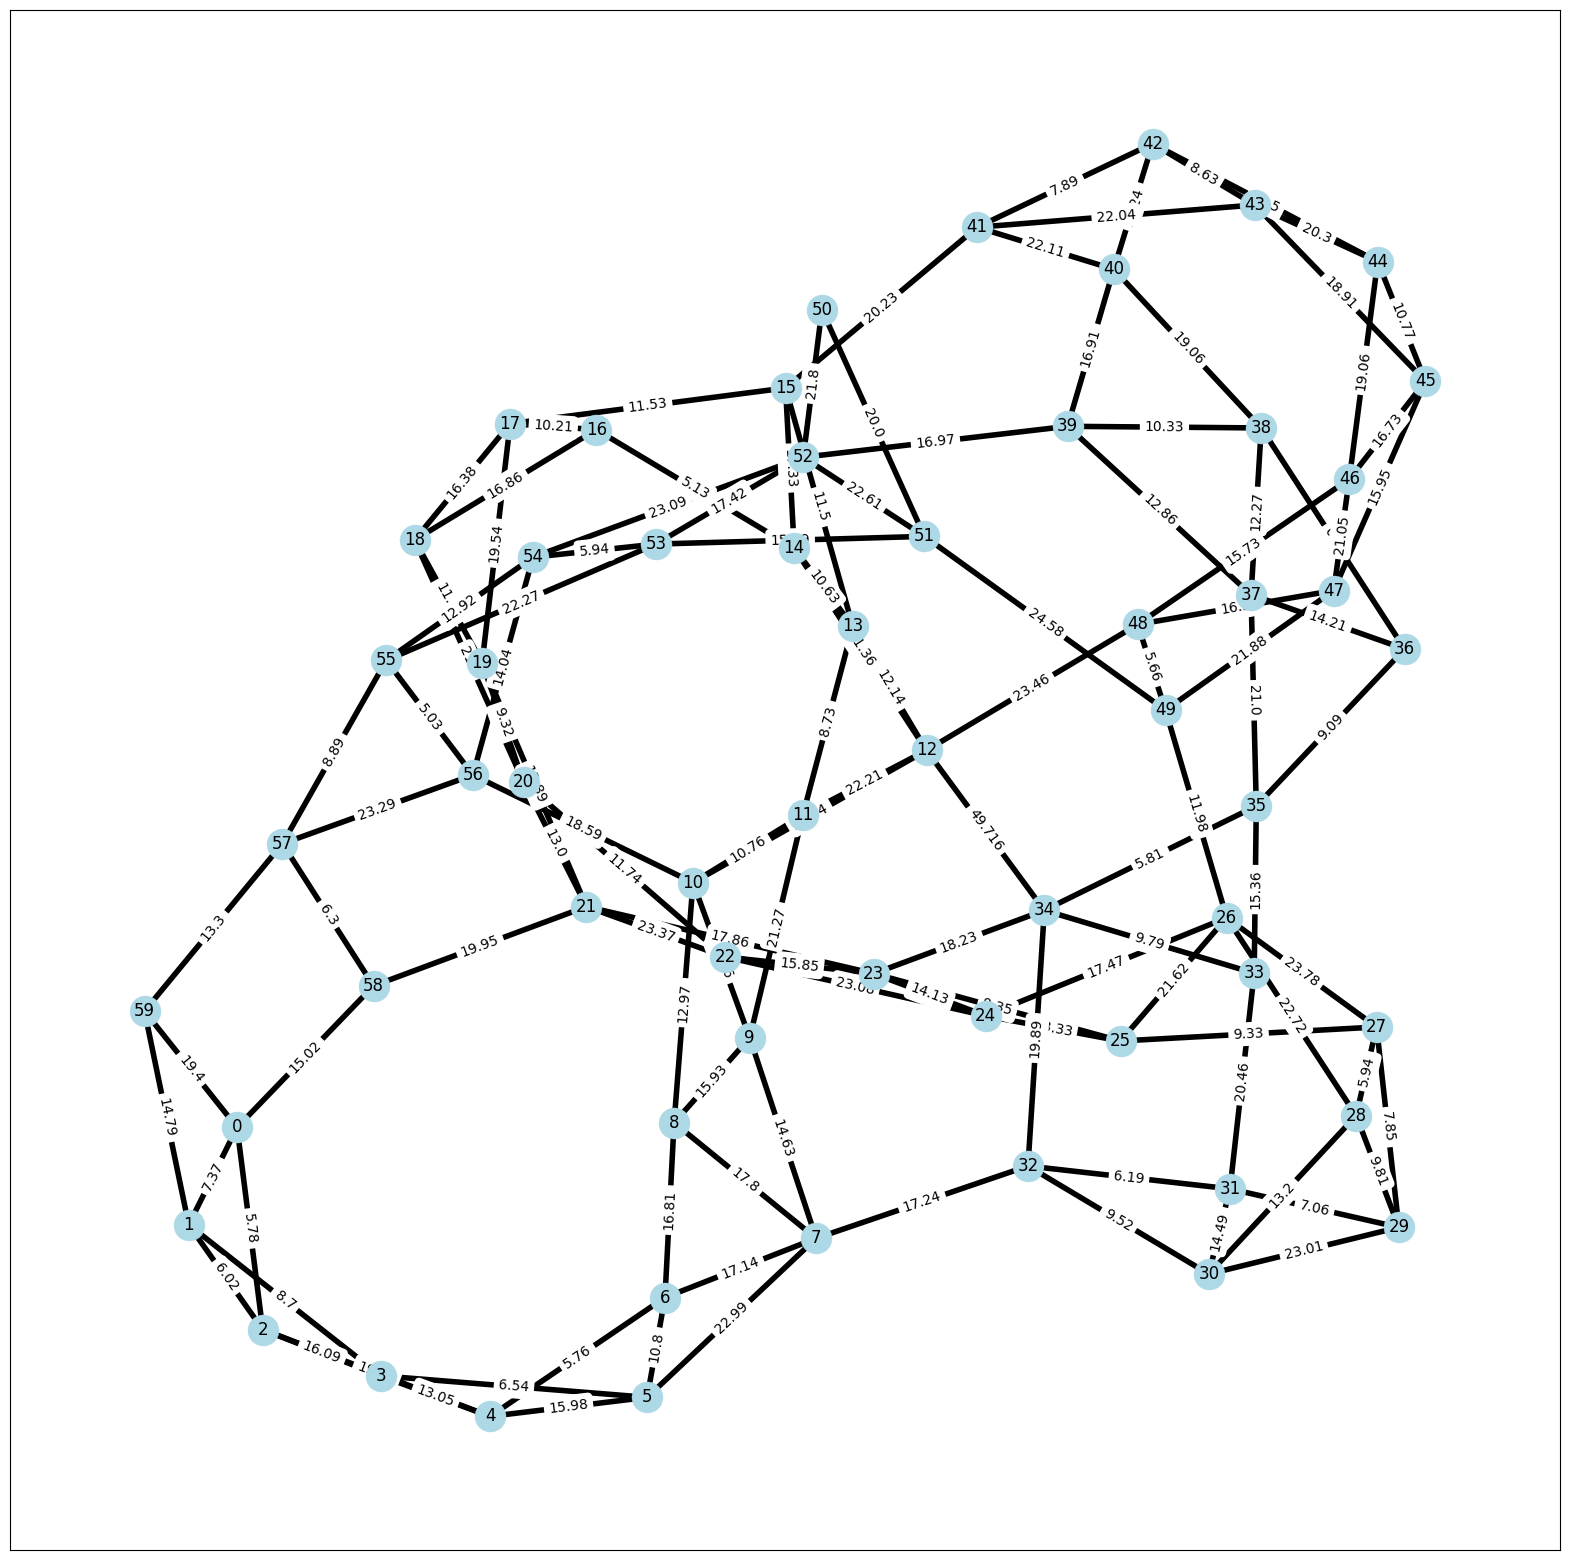

Recommendation - 2
{(0, 49): 70722220.94, (49, 58): 69551491.38, (7, 26): 68405699.17, (34, 49): 68300207.76, (5, 49): 67864851.15, (32, 49): 67751169.1, (49, 57): 67522376.7, (21, 49): 67133327.79, (2, 49): 66629928.97, (39, 49): 66531943.87, (1, 49): 66512232.16, (7, 49): 65720797.05, (5, 26): 65241742.75, (7, 48): 64916773.4, (10, 39): 64528541.26, (5, 48): 63928379.86, (10, 21): 63900677.36, (49, 59): 63452881.15, (15, 32): 63196427.76, (10, 34): 63015104.3, (3, 48): 62822643.97, (26, 58): 62714631.6, (9, 49): 62345787.75, (21, 32): 62086992.55, (0, 26): 62044507.8, (3, 49): 61716589.1, (23, 56): 61653416.41, (6, 49): 61222443.97, (7, 39): 61000944.67, (7, 17): 60693961.15, (7, 21): 60684456.04, (7, 41): 60627129.15, (34, 48): 60444935.02, (1, 26): 60438420.57, (2, 26): 60216013.44, (35, 49): 59991878.54, (34, 56): 59633442.05, (10, 23): 59499275.31, (21, 44): 59353154.21, (3, 26): 59262407.66, (19, 32): 59195889.99, (8, 49): 59188876.93, (12, 52): 59151625.8, (7, 23): 59120604.8, 

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


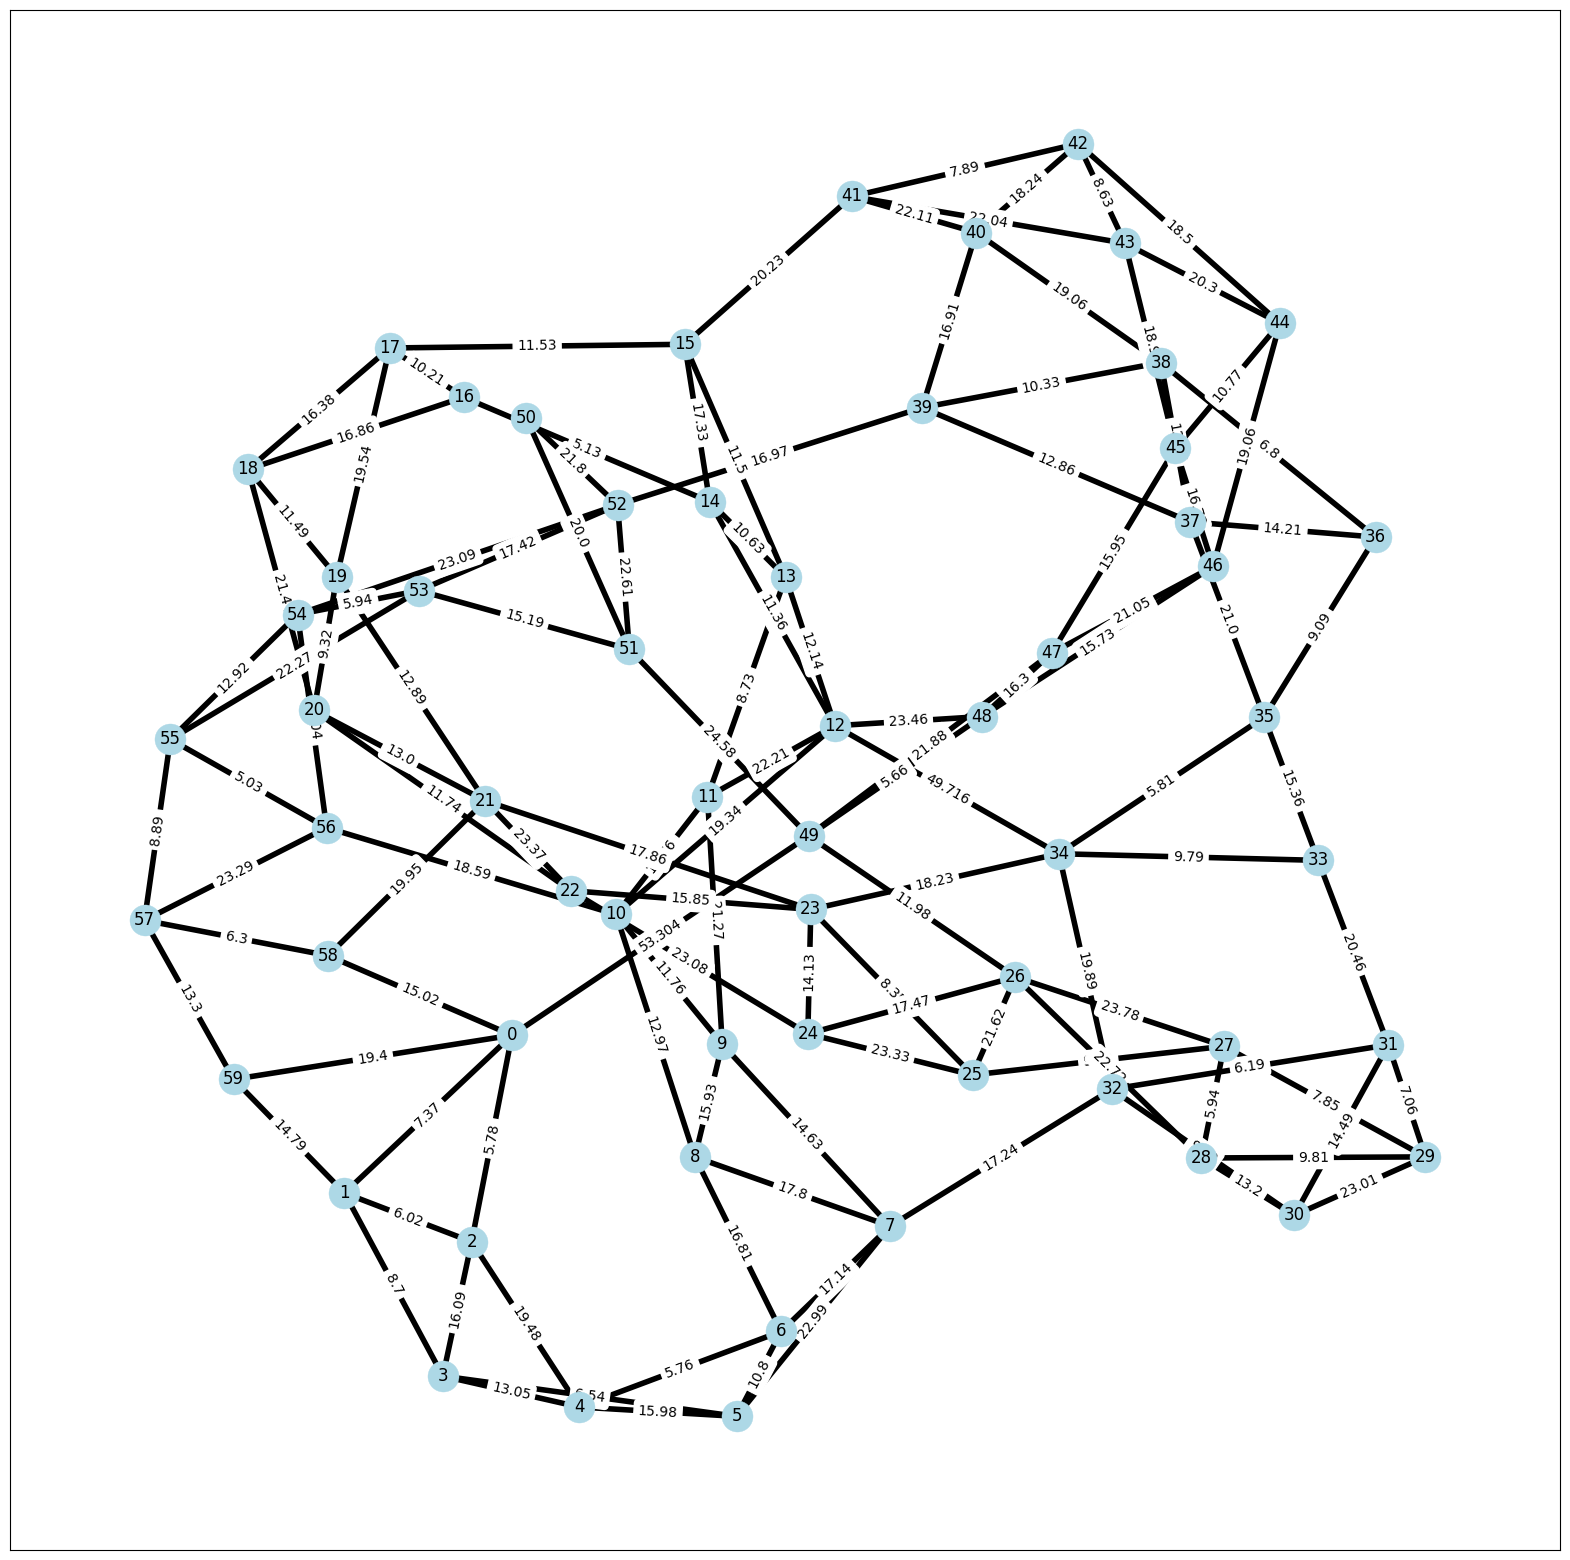

Recommendation - 3
{(7, 26): 68405699.17, (34, 49): 68300207.76, (32, 49): 67751169.1, (21, 49): 67133327.79, (39, 49): 66531943.87, (10, 39): 64528541.26, (10, 21): 63900677.36, (7, 48): 63822709.44, (15, 32): 63196427.76, (10, 34): 63015104.3, (49, 57): 62591299.55, (9, 49): 62345787.75, (49, 58): 62130357.2, (21, 32): 62086992.55, (23, 56): 61653416.41, (7, 49): 61101101.47, (7, 39): 61000944.67, (7, 17): 60693961.15, (7, 21): 60684456.04, (7, 41): 60627129.15, (34, 48): 60444935.02, (35, 49): 59991878.54, (34, 56): 59633442.05, (10, 23): 59499275.31, (5, 49): 59444831.61, (19, 32): 59195889.99, (8, 49): 59188876.93, (12, 52): 59151625.8, (7, 23): 59120604.8, (49, 56): 58968153.4, (41, 49): 58923554.83, (21, 44): 58579957.56, (3, 49): 58524766.64, (32, 45): 58395798.87, (32, 52): 58256869.68, (40, 49): 58223867.66, (10, 26): 58176207.71, (32, 40): 58067765.6, (26, 41): 57861206.41, (26, 58): 57783554.45, (34, 57): 57734071.44, (10, 52): 57623105.46, (12, 37): 57447340.63, (7, 15): 5

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


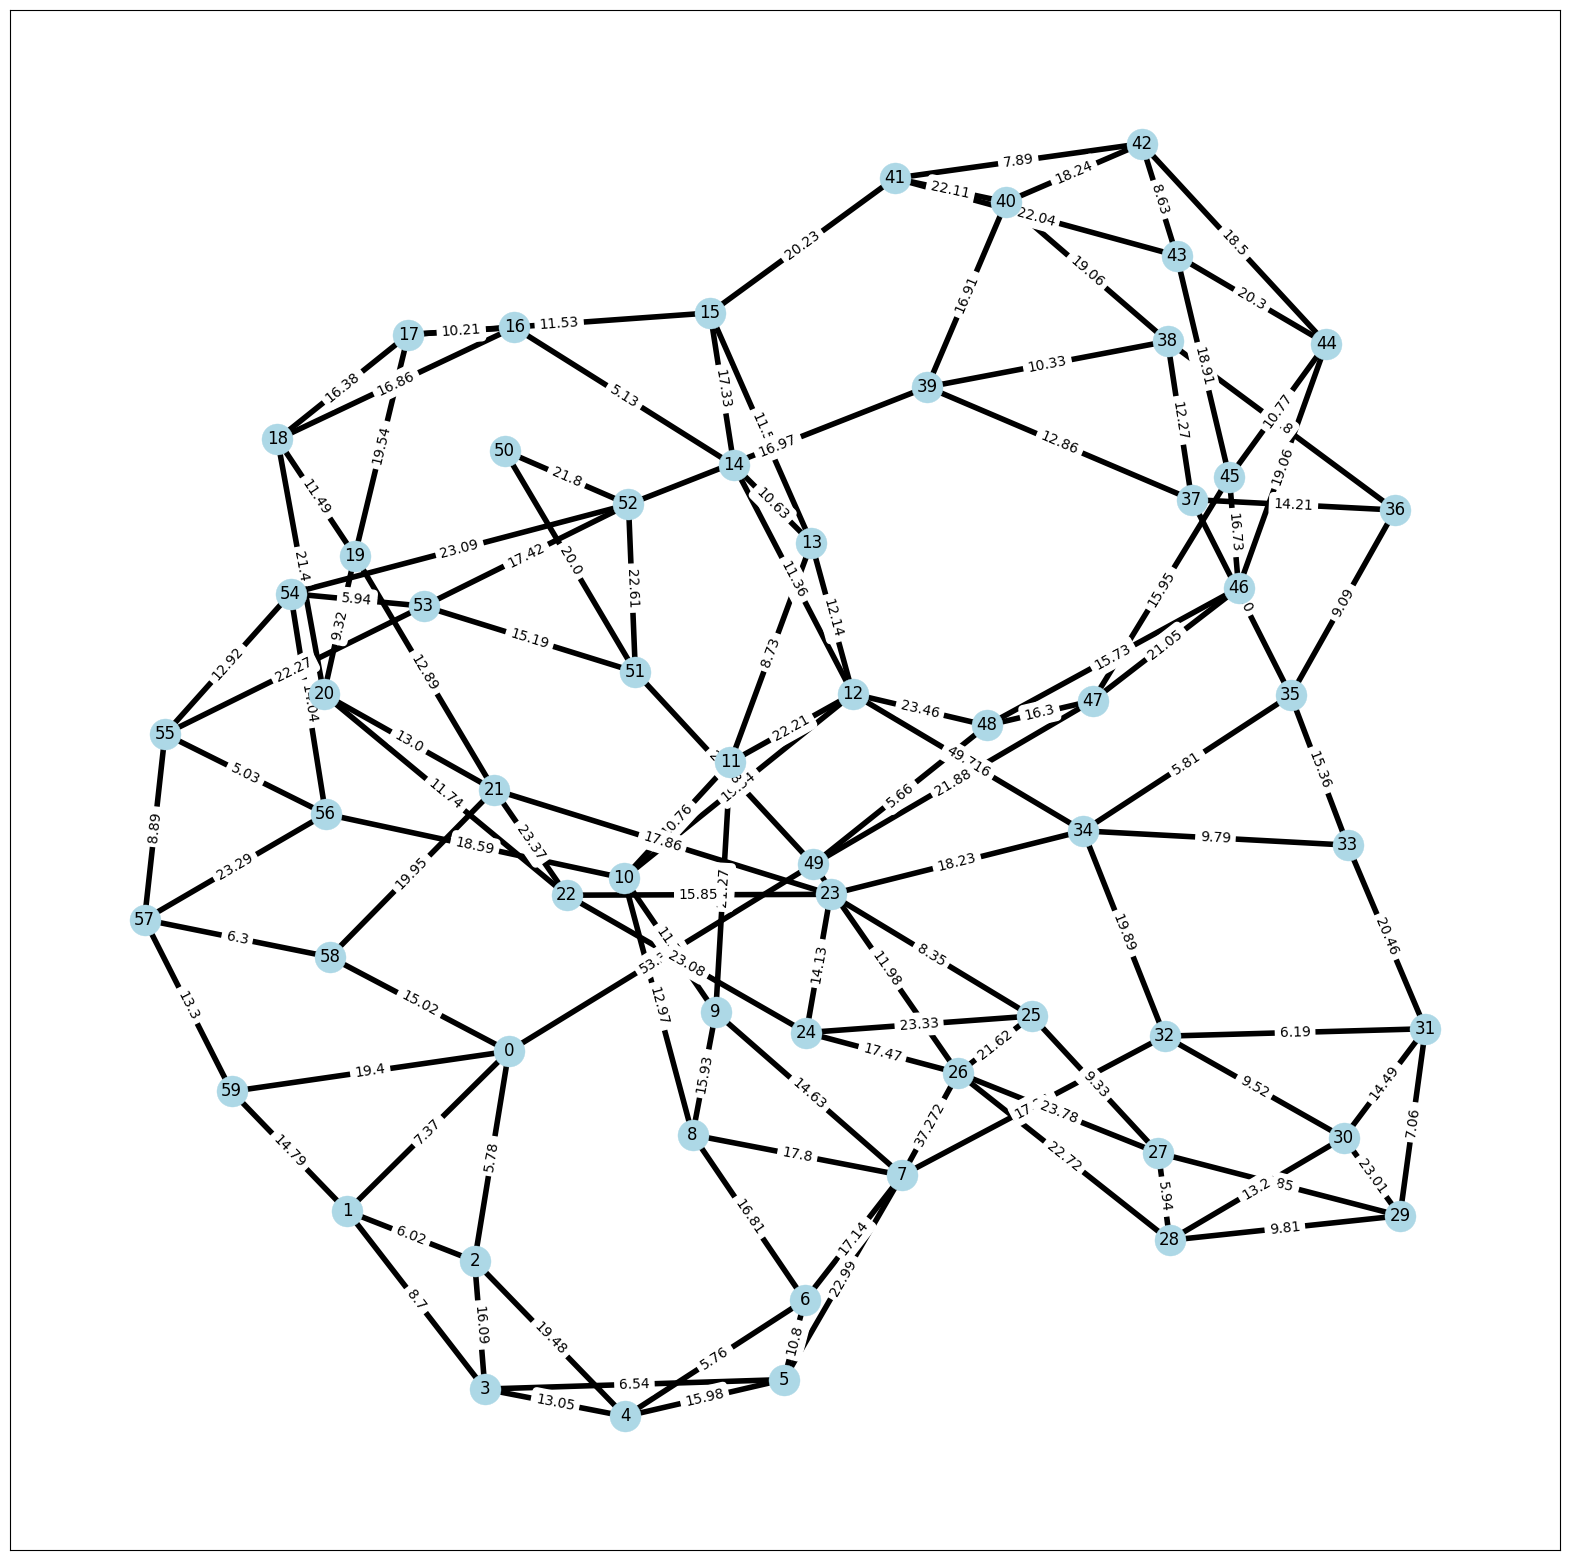

In [ ]:
# R3 - Start
connectivity = 0.05
G1 = generate_random_node(60, connectivity)
G11 = G1.copy()
display_graph(G1)
f = 0.6

# Generate trips for G1
G1_trips = simulate_traffic(G1, 60, 100)
print(G1_trips)

# R3 - A) The k roads that need to be constructed. You may identify these roads by their start and end points.
divider("R3 - A")
roads_to_build = get_roads_to_build(G1)
print(f"The {len(roads_to_build)} road(s) has to be build")
print(roads_to_build)

# R3 - B) The benefit value for each of the 3 roads that you have recommended for construction
divider("R3 - B")
k = 3
build_roads(60, k, f, G1, G1_trips)

********** R4 - A **********
The 1650 road(s) has to be build
[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 5

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


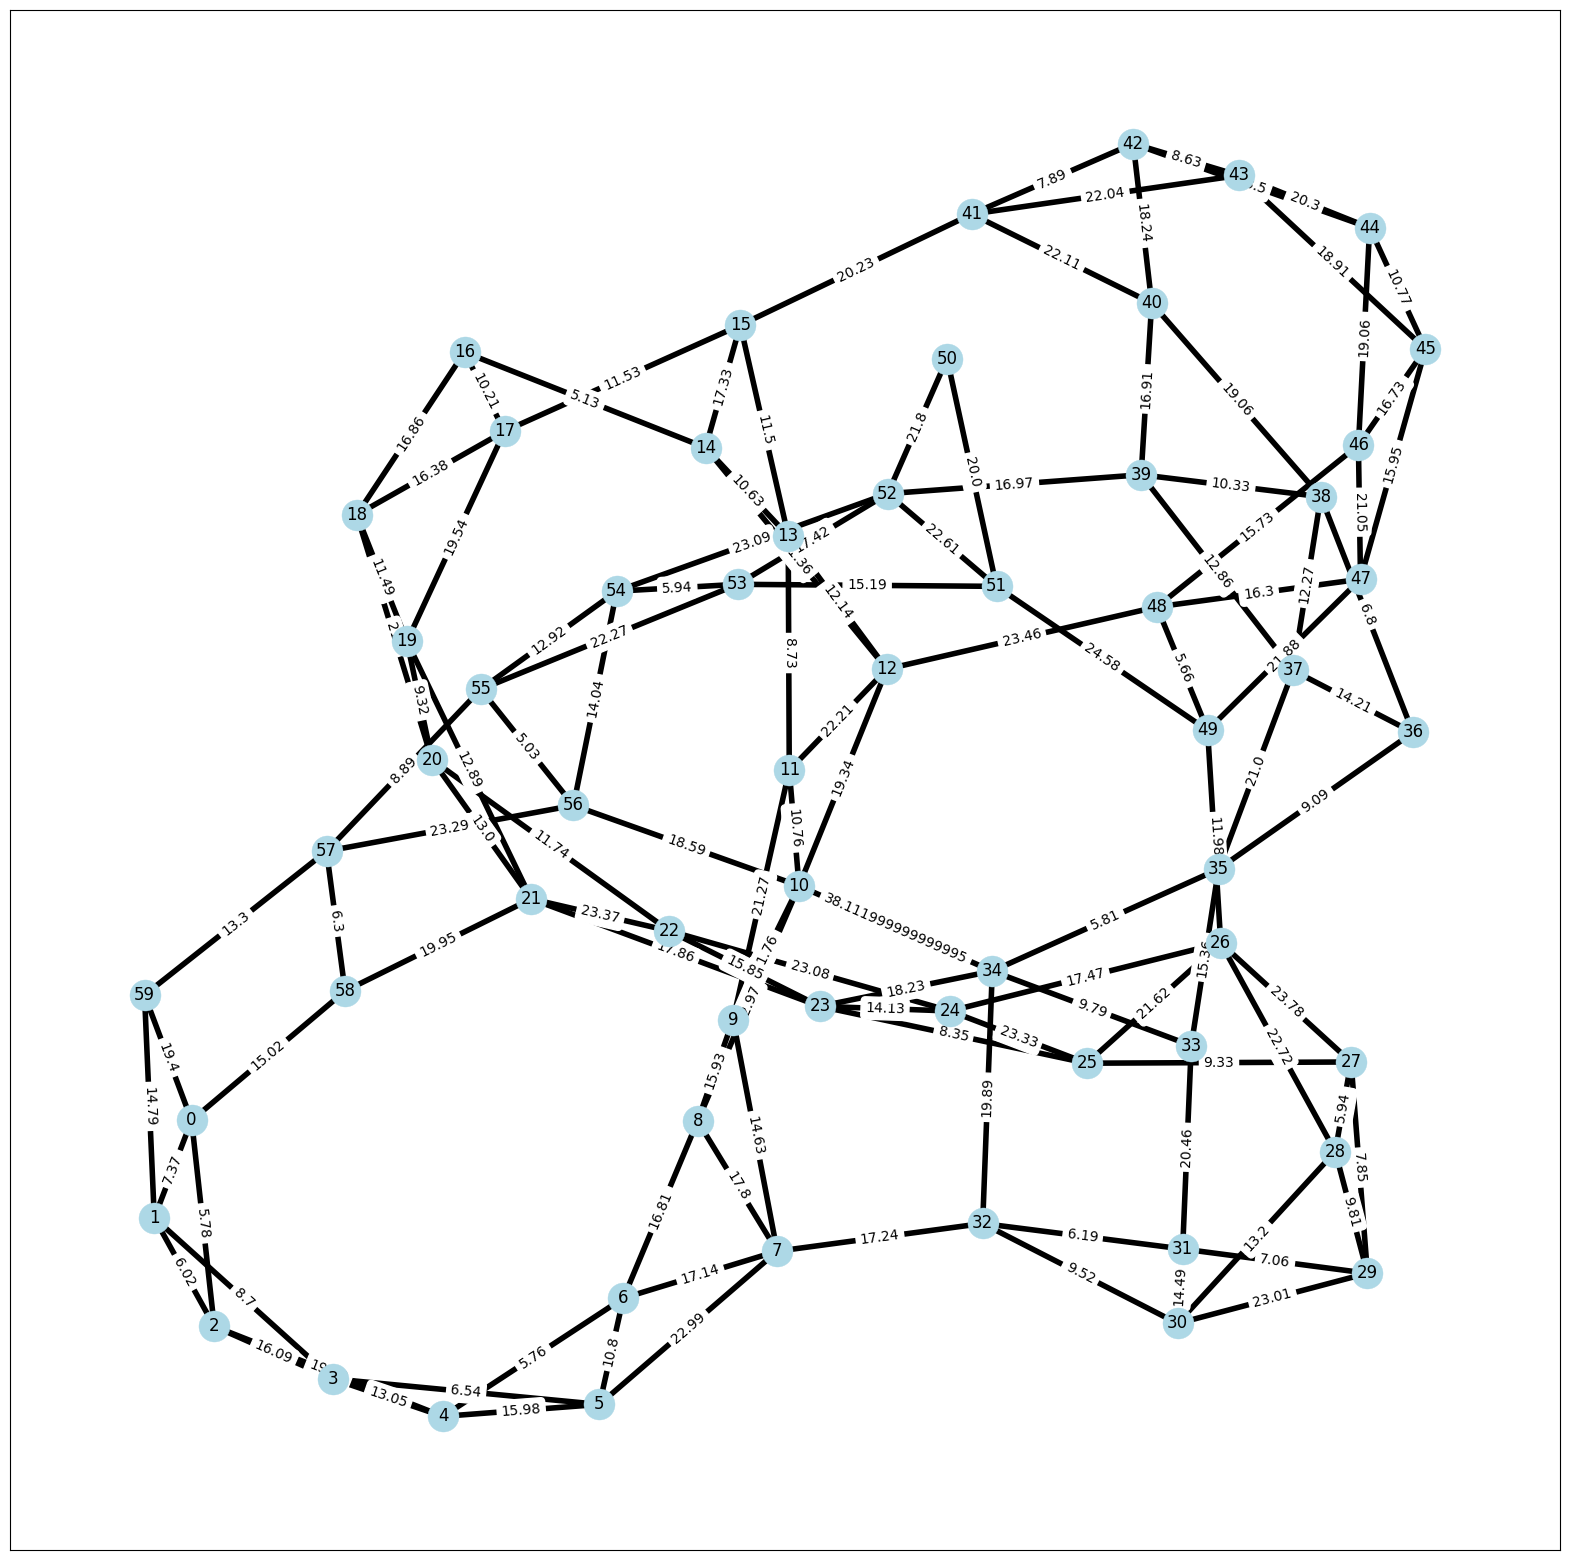

Recommendation - 2
{(0, 49): 57534065.09, (49, 58): 56305053.41, (7, 26): 56193230.19, (32, 49): 55874582.08, (34, 49): 55525365.86, (49, 57): 55476133.5, (39, 49): 54537680.99, (21, 49): 54277921.9, (5, 49): 53849634.61, (5, 48): 53826159.11, (2, 49): 53680765.64, (3, 48): 53399639.42, (5, 26): 53349305.43, (1, 49): 53151805.5, (7, 48): 52599334.36, (9, 49): 52477933.81, (49, 59): 51771853.4, (26, 58): 51749928.78, (0, 26): 51216337.8, (21, 32): 51177475.8, (15, 32): 50691831.92, (7, 17): 50303266.1, (7, 49): 49843523.43, (2, 26): 49658960.46, (6, 49): 49587983.84, (1, 26): 49431783.45, (8, 49): 49056072.15, (19, 32): 49035044.34, (34, 48): 48854961.81, (32, 40): 48555092.09, (3, 49): 48236177.06, (7, 39): 48192402.02, (35, 49): 48169347.71, (21, 44): 48161234.34, (0, 48): 48136396.86, (1, 48): 48124432.36, (2, 48): 48099548.73, (7, 41): 48026110.32, (3, 26): 47956042.07, (49, 56): 47656594.1, (4, 49): 47624738.54, (48, 58): 47584953.57, (7, 53): 47553914.96, (7, 15): 47527089.61, (48

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


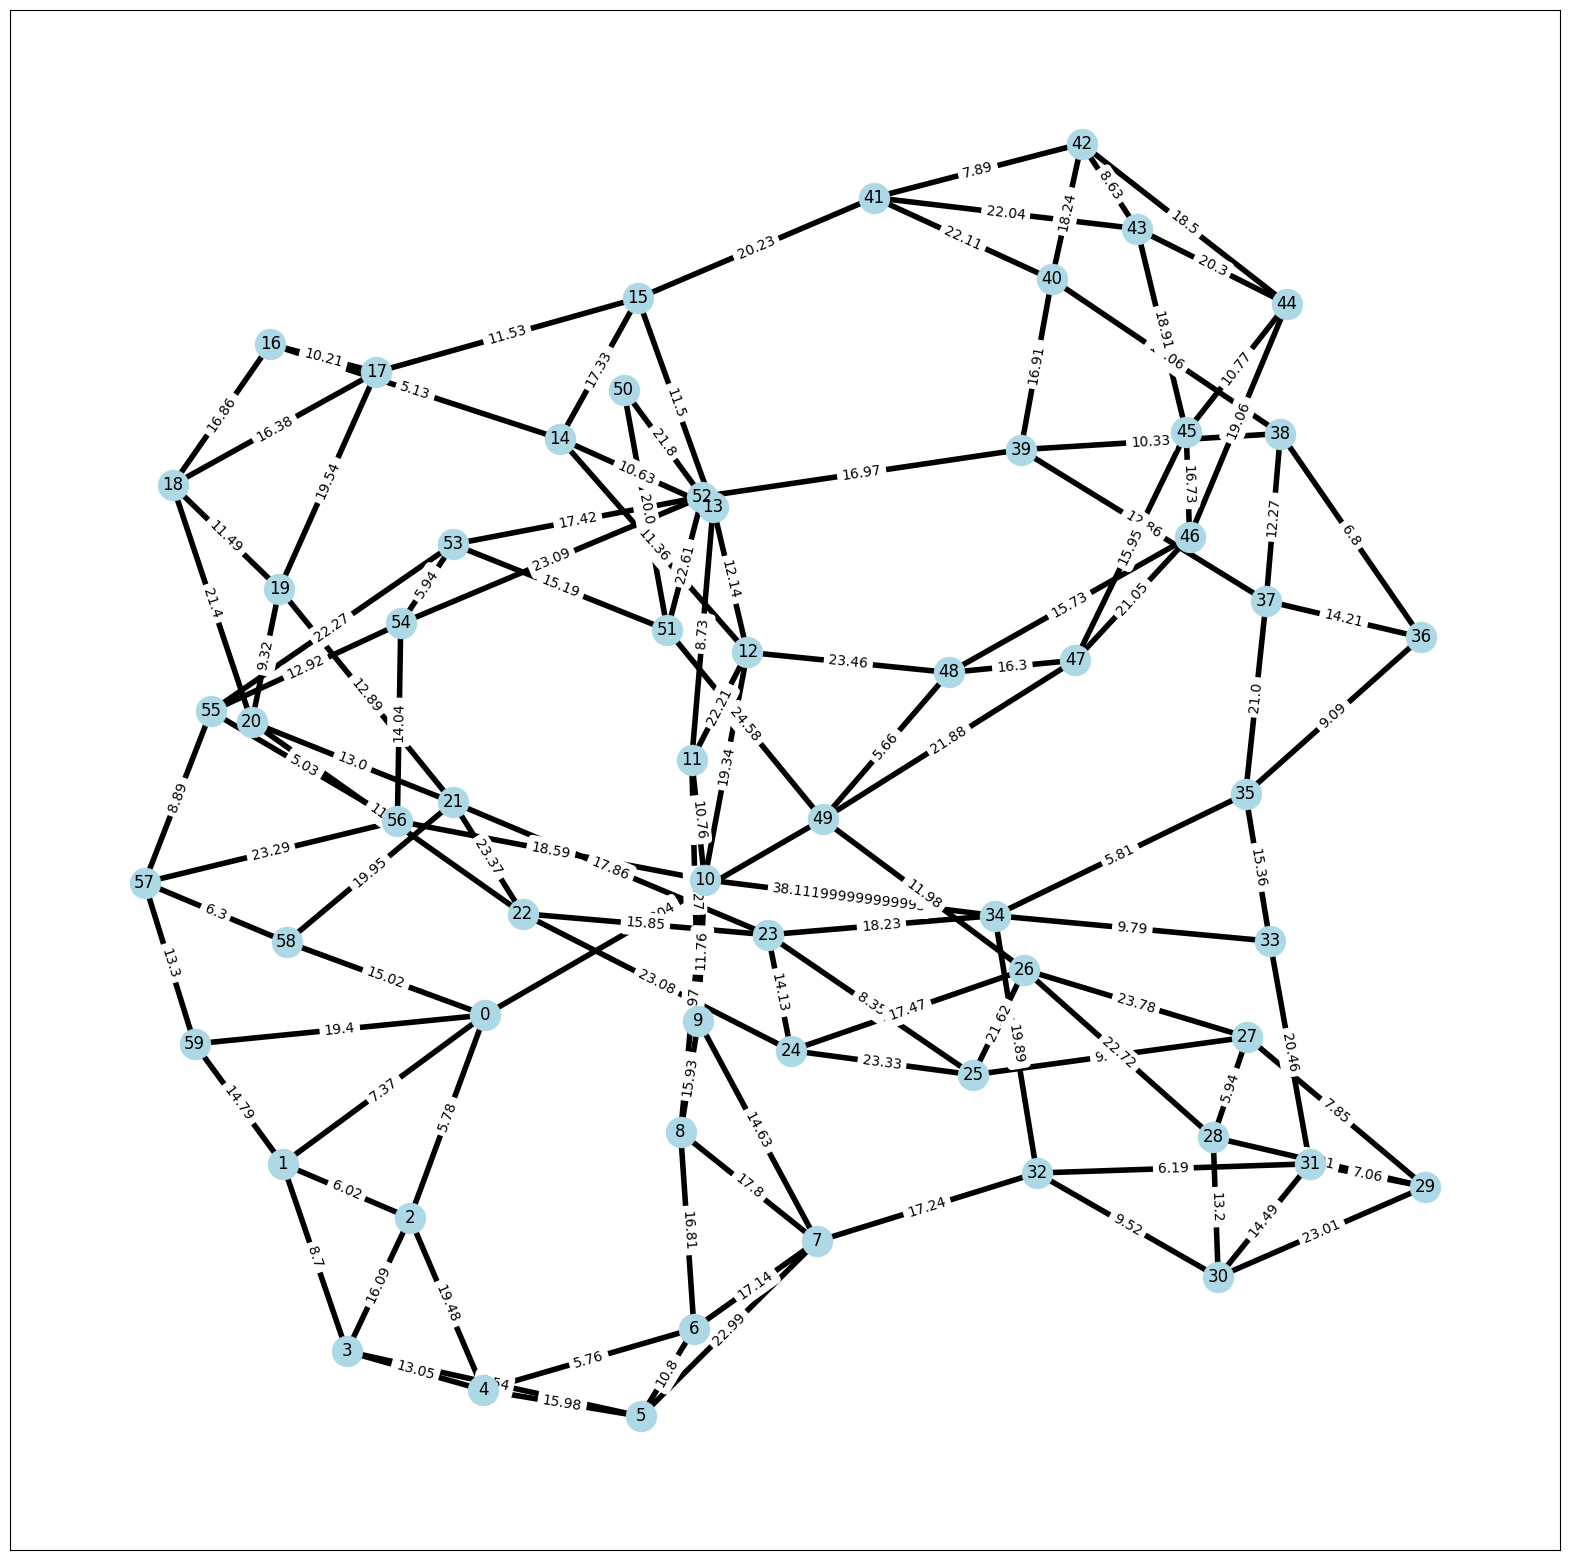

Recommendation - 3
{(7, 26): 56193230.19, (32, 49): 55874582.08, (34, 49): 55525365.86, (39, 49): 54537680.99, (21, 49): 54277921.9, (9, 49): 52477933.81, (7, 48): 51505270.39, (21, 32): 51177475.8, (15, 32): 50691831.92, (49, 57): 50545056.35, (7, 17): 50303266.1, (49, 58): 49870134.66, (8, 49): 49056072.15, (19, 32): 49035044.34, (34, 48): 48854961.81, (3, 49): 48740396.43, (32, 40): 48555092.09, (7, 39): 48192402.02, (35, 49): 48169347.71, (7, 41): 48026110.32, (49, 56): 47656594.1, (7, 53): 47553914.96, (7, 15): 47527089.61, (5, 49): 47495694.72, (21, 44): 47388037.69, (12, 52): 47230035.19, (7, 23): 47066791.42, (41, 49): 46913596.58, (23, 40): 46825636.71, (26, 58): 46818851.63, (32, 52): 46791617.2, (32, 45): 46732168.74, (21, 41): 46680470.99, (9, 52): 46278242.14, (6, 48): 46241116.89, (34, 44): 46059351.42, (7, 21): 46020218.04, (10, 52): 45819866.96, (26, 38): 45658713.94, (7, 54): 45595688.53, (12, 34): 45582745.9, (10, 49): 45497339.75, (21, 26): 45470871.34, (26, 34): 454

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


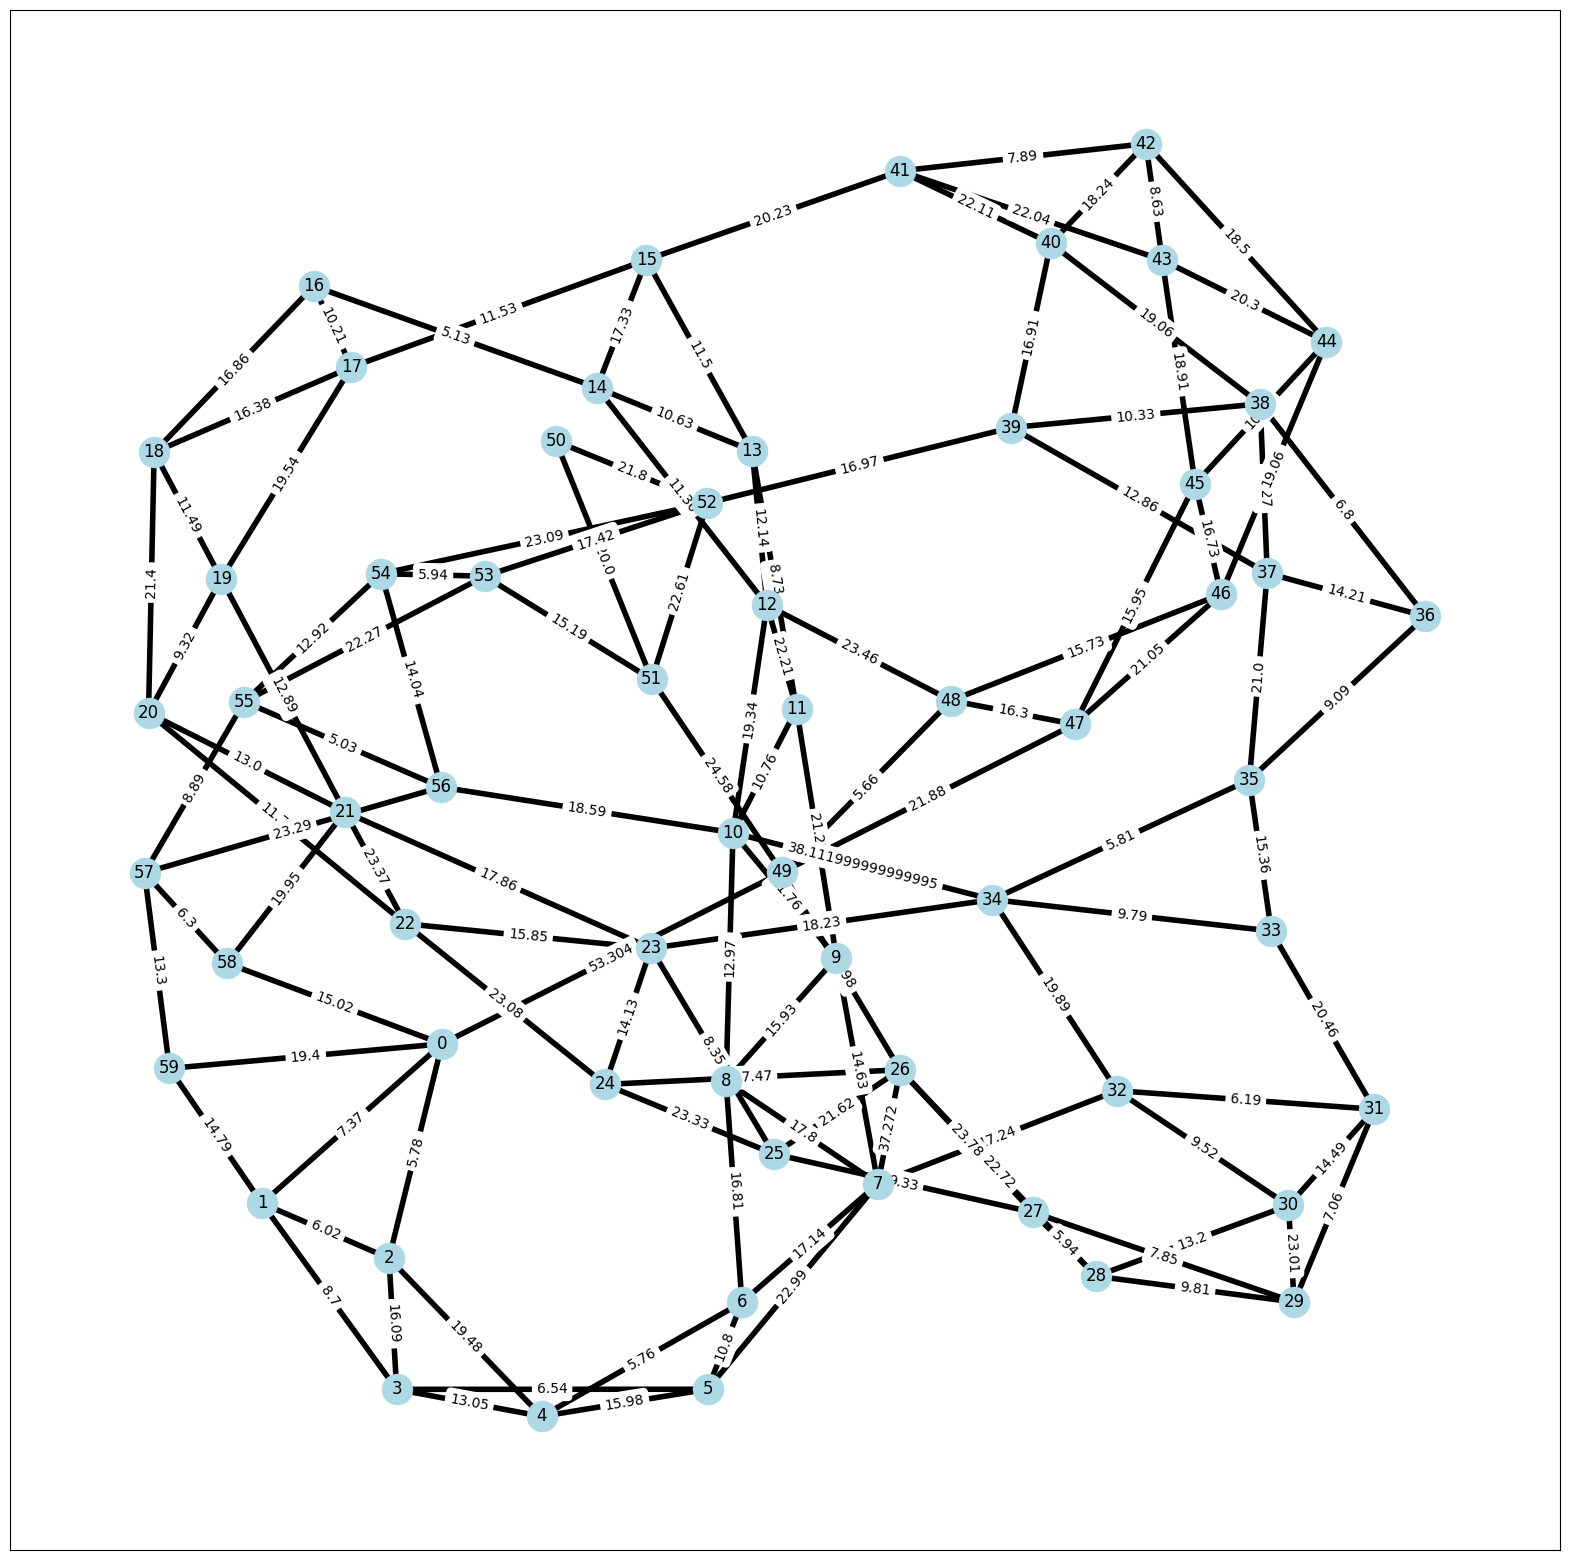

In [ ]:
# R4 - Start
f = 0.8

# R4 - A) The k roads that need to be constructed. You may identify these roads by their start and end points.
divider("R4 - A")
roads_to_build = get_roads_to_build(G11)
print(f"The {len(roads_to_build)} road(s) has to be build")
print(roads_to_build)

# R4 - B) The benefit value for each of the 3 roads that you have recommended for construction
divider("R4 - B")
k = 3
build_roads(60, k, f, G11, G1_trips)

# R4 - C) Have your recommendations changed from R3? If so, why do you think they have changed ?
#

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


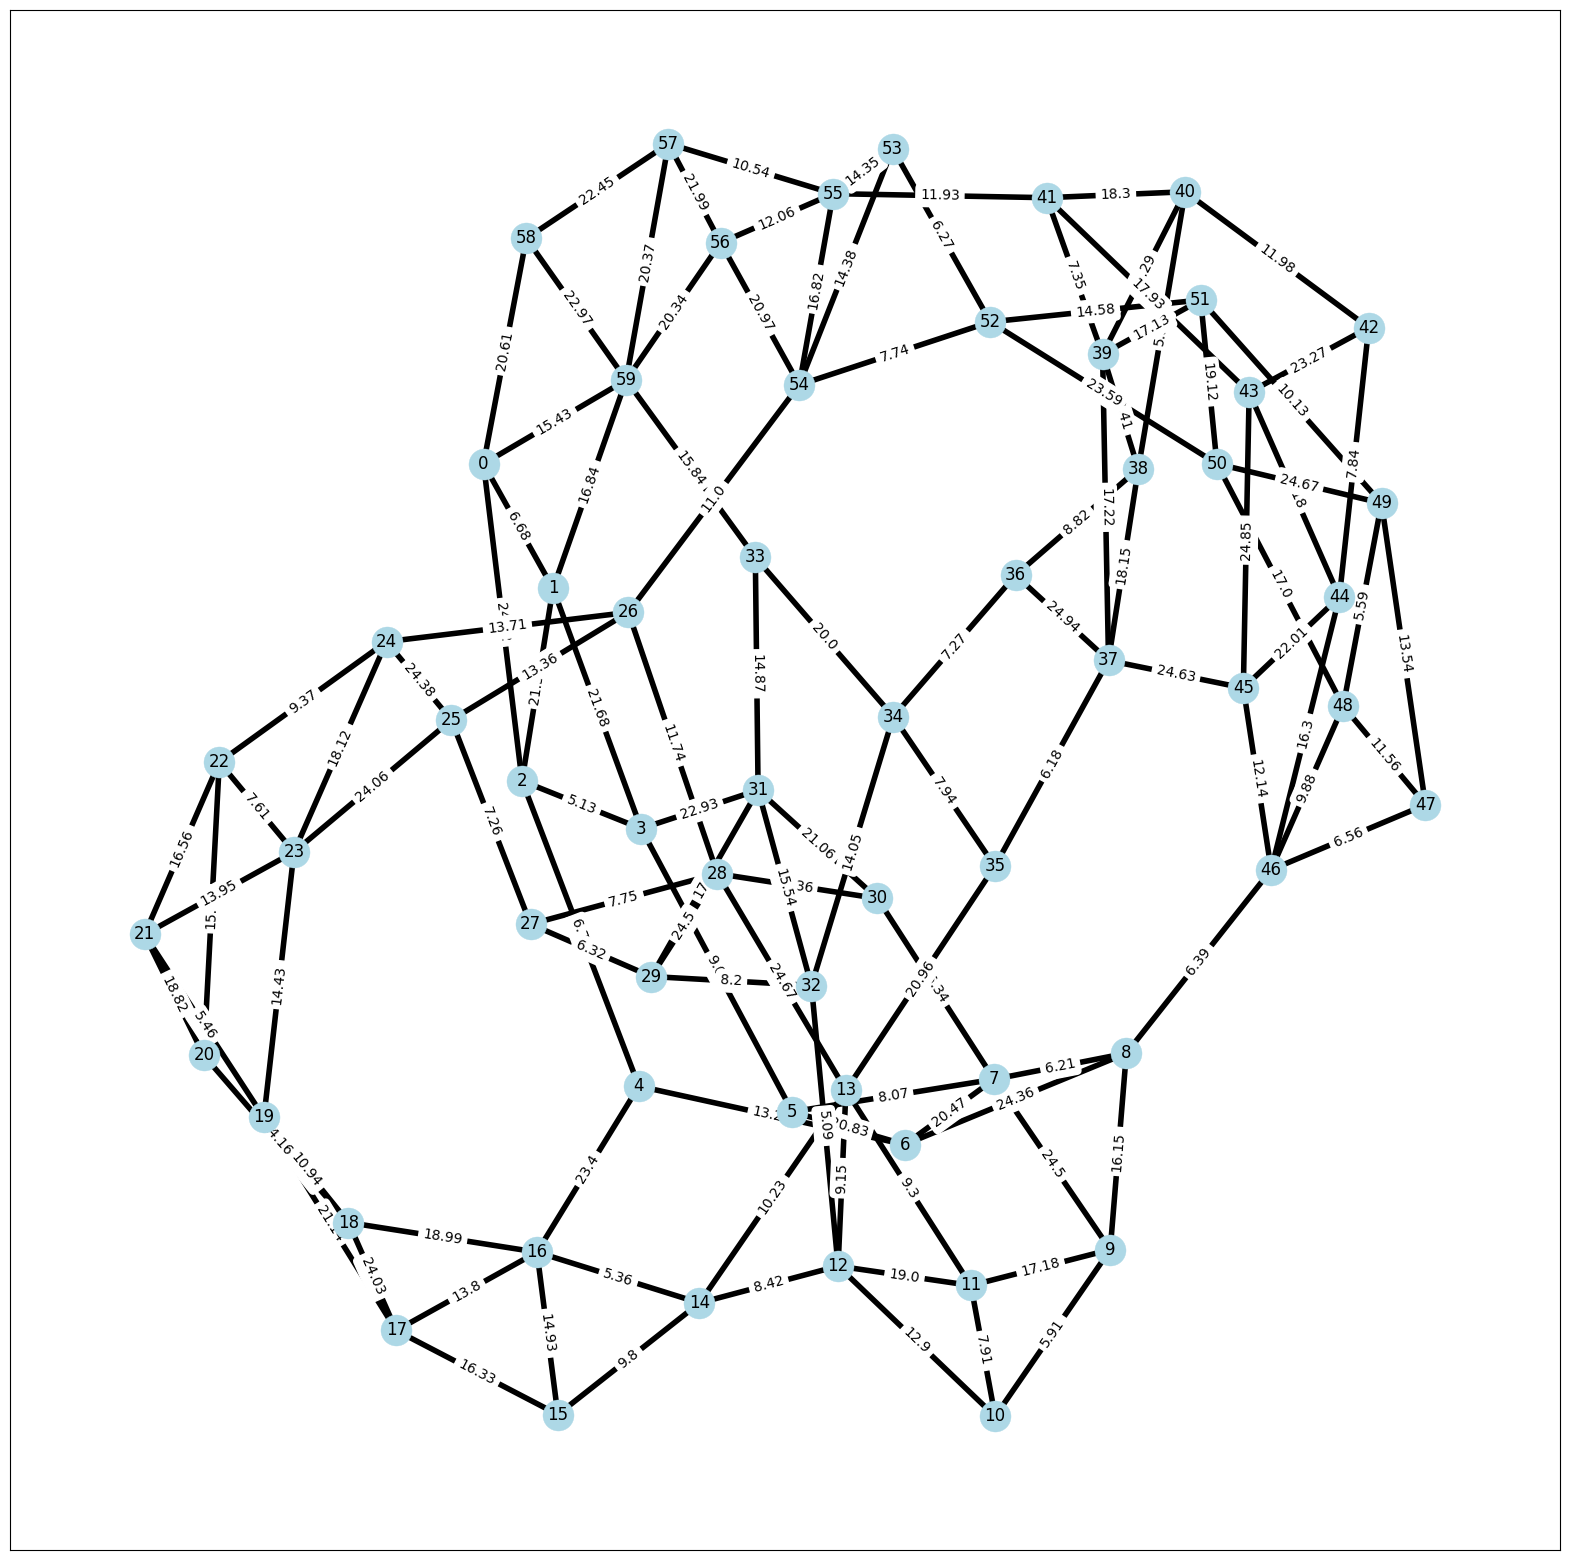

[[65434, 172912, 197725, 179060, 361083, 126126, 307752, 261249, 459377, 171244, 72330, 153912, 173402, 555483, 361478, 69260, 477013, 90666, 255106, 141650, 126803, 75059, 139940, 199908, 324700, 158811, 677534, 142463, 498313, 174005, 222592, 242725, 194896, 212495, 260850, 396089, 158701, 437953, 114617, 253599, 91919, 317327, 79039, 193375, 146463, 234202, 503781, 71804, 208590, 86704, 209747, 155595, 287906, 78316, 635126, 353948, 242965, 153494, 71731, 316423], [65434, 172912, 197725, 179060, 361083, 126126, 307752, 261249, 459377, 171244, 72330, 153912, 173402, 555483, 361478, 69260, 477013, 90666, 255106, 141650, 126803, 75059, 139940, 199908, 324700, 158811, 677534, 142463, 498313, 174005, 222592, 242725, 194896, 212495, 260850, 396089, 158701, 437953, 114617, 253599, 91919, 317327, 79039, 193375, 146463, 234202, 503781, 71804, 208590, 86704, 209747, 155595, 287906, 78316, 635126, 353948, 242965, 153494, 71731, 316423], [65434, 172912, 197725, 179060, 361083, 126126, 307752, 2

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


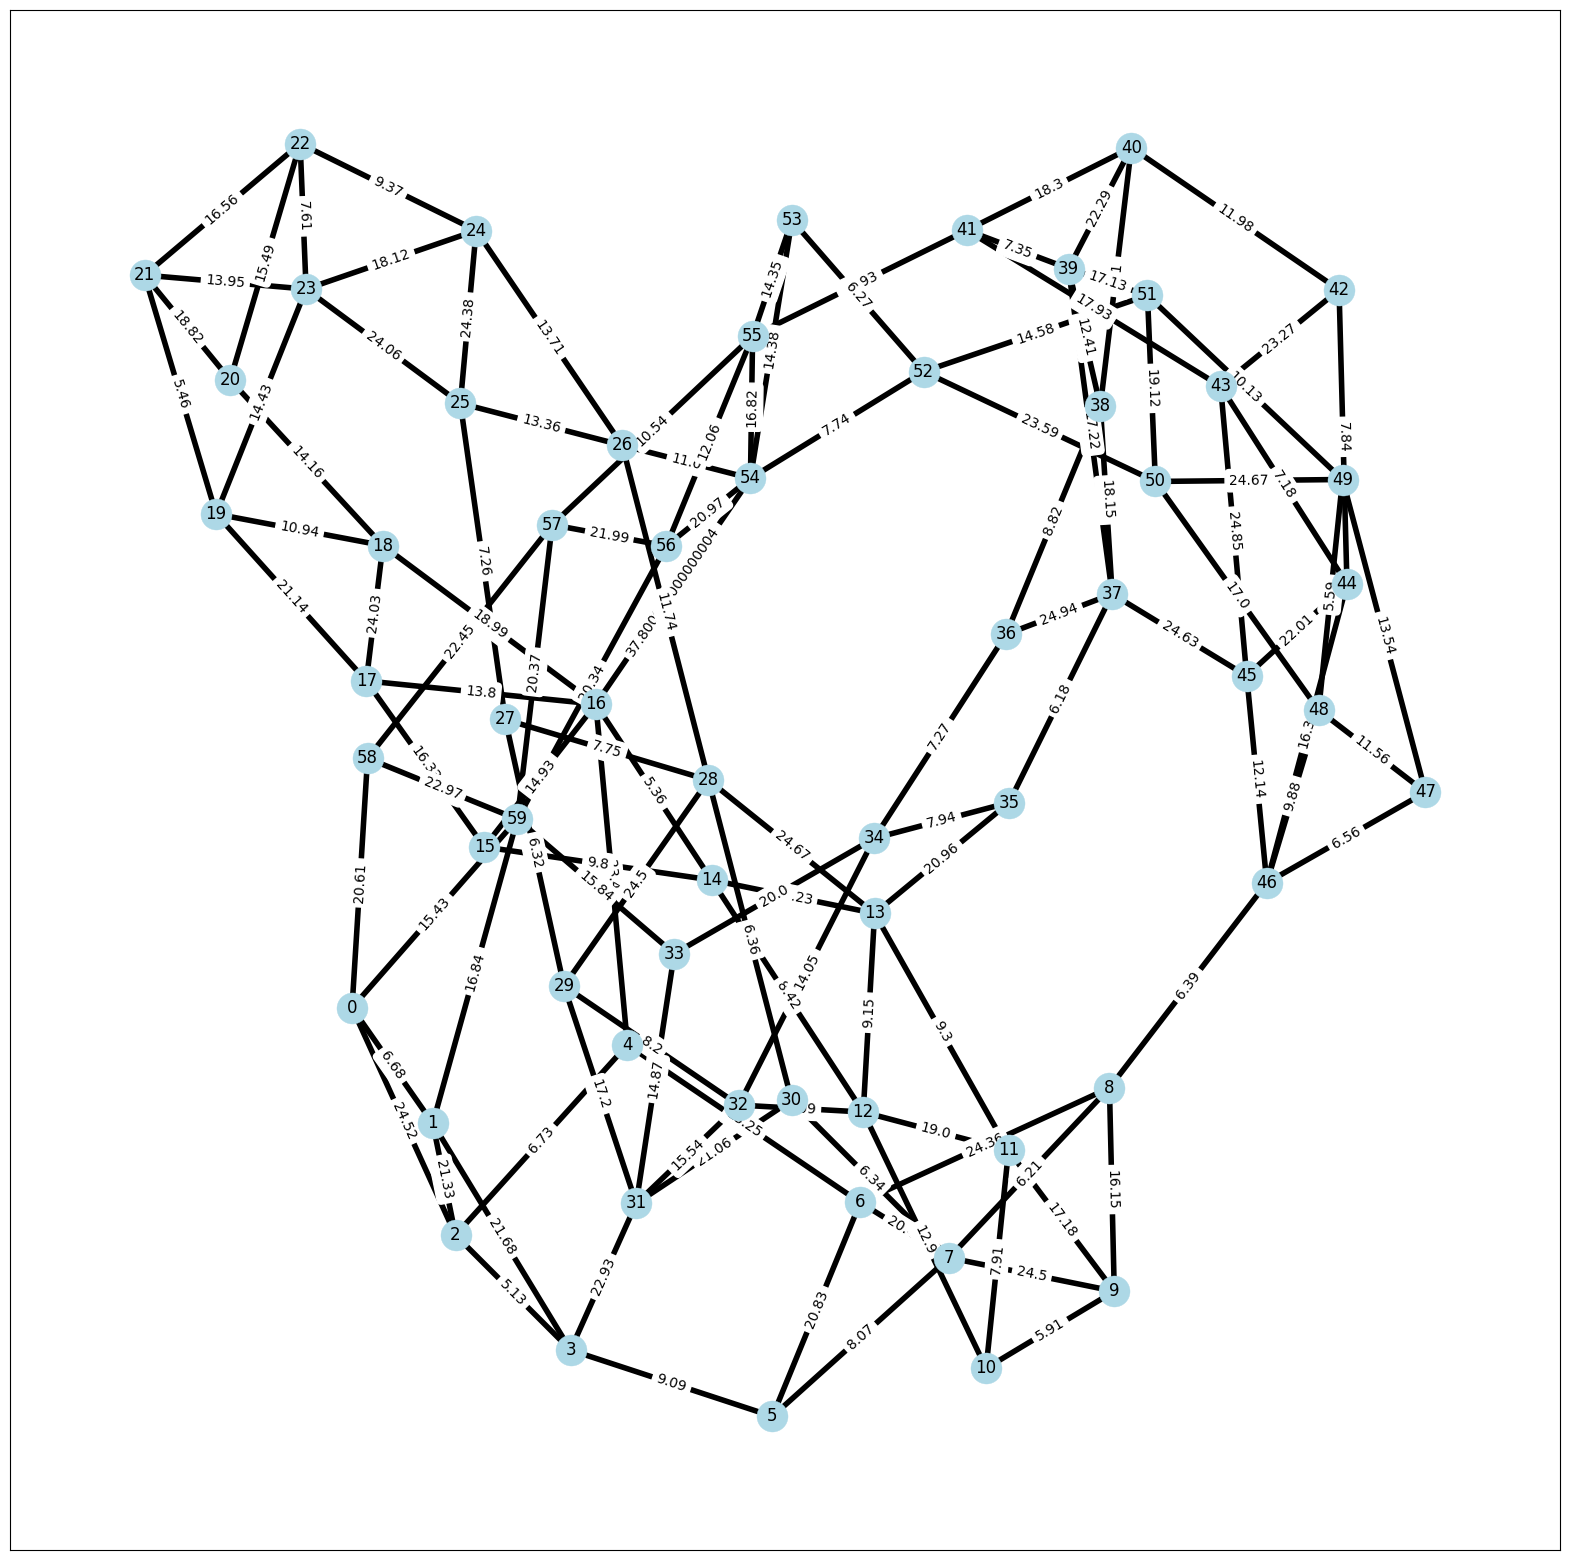

Recommendation - 2
{(37, 54): 66284346.99, (26, 35): 64401167.5, (26, 37): 58956530.38, (26, 34): 55903065.19, (13, 54): 54251910.9, (4, 35): 54195975.02, (13, 55): 54126278.21, (16, 46): 54047158.59, (24, 35): 53935839.14, (4, 37): 53447809.39, (8, 18): 52437134.5, (4, 54): 52204048.97, (18, 46): 52101825.59, (28, 35): 51417567.86, (2, 26): 51341821.08, (8, 16): 51306979.83, (1, 26): 51278661.15, (24, 37): 51176642.74, (16, 55): 51140203.5, (13, 41): 50904275.46, (16, 39): 50712668.32, (8, 54): 50621936.26, (46, 55): 50561391.3, (13, 26): 50429859.83, (26, 39): 50337200.7, (16, 41): 50294048.26, (6, 54): 50234176.83, (2, 54): 50203203.23, (46, 54): 50201332.27, (28, 37): 49934881.2, (26, 59): 49758276.35, (16, 26): 49573750.7, (14, 26): 49563222.03, (6, 41): 48827179.43, (4, 41): 48798264.15, (6, 37): 48679895.12, (14, 46): 48610020.56, (16, 44): 48441911.68, (6, 26): 48413753.98, (4, 55): 48362807.26, (35, 54): 48343560.82, (23, 35): 48020574.08, (26, 46): 47748020.89, (13, 59): 4765

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


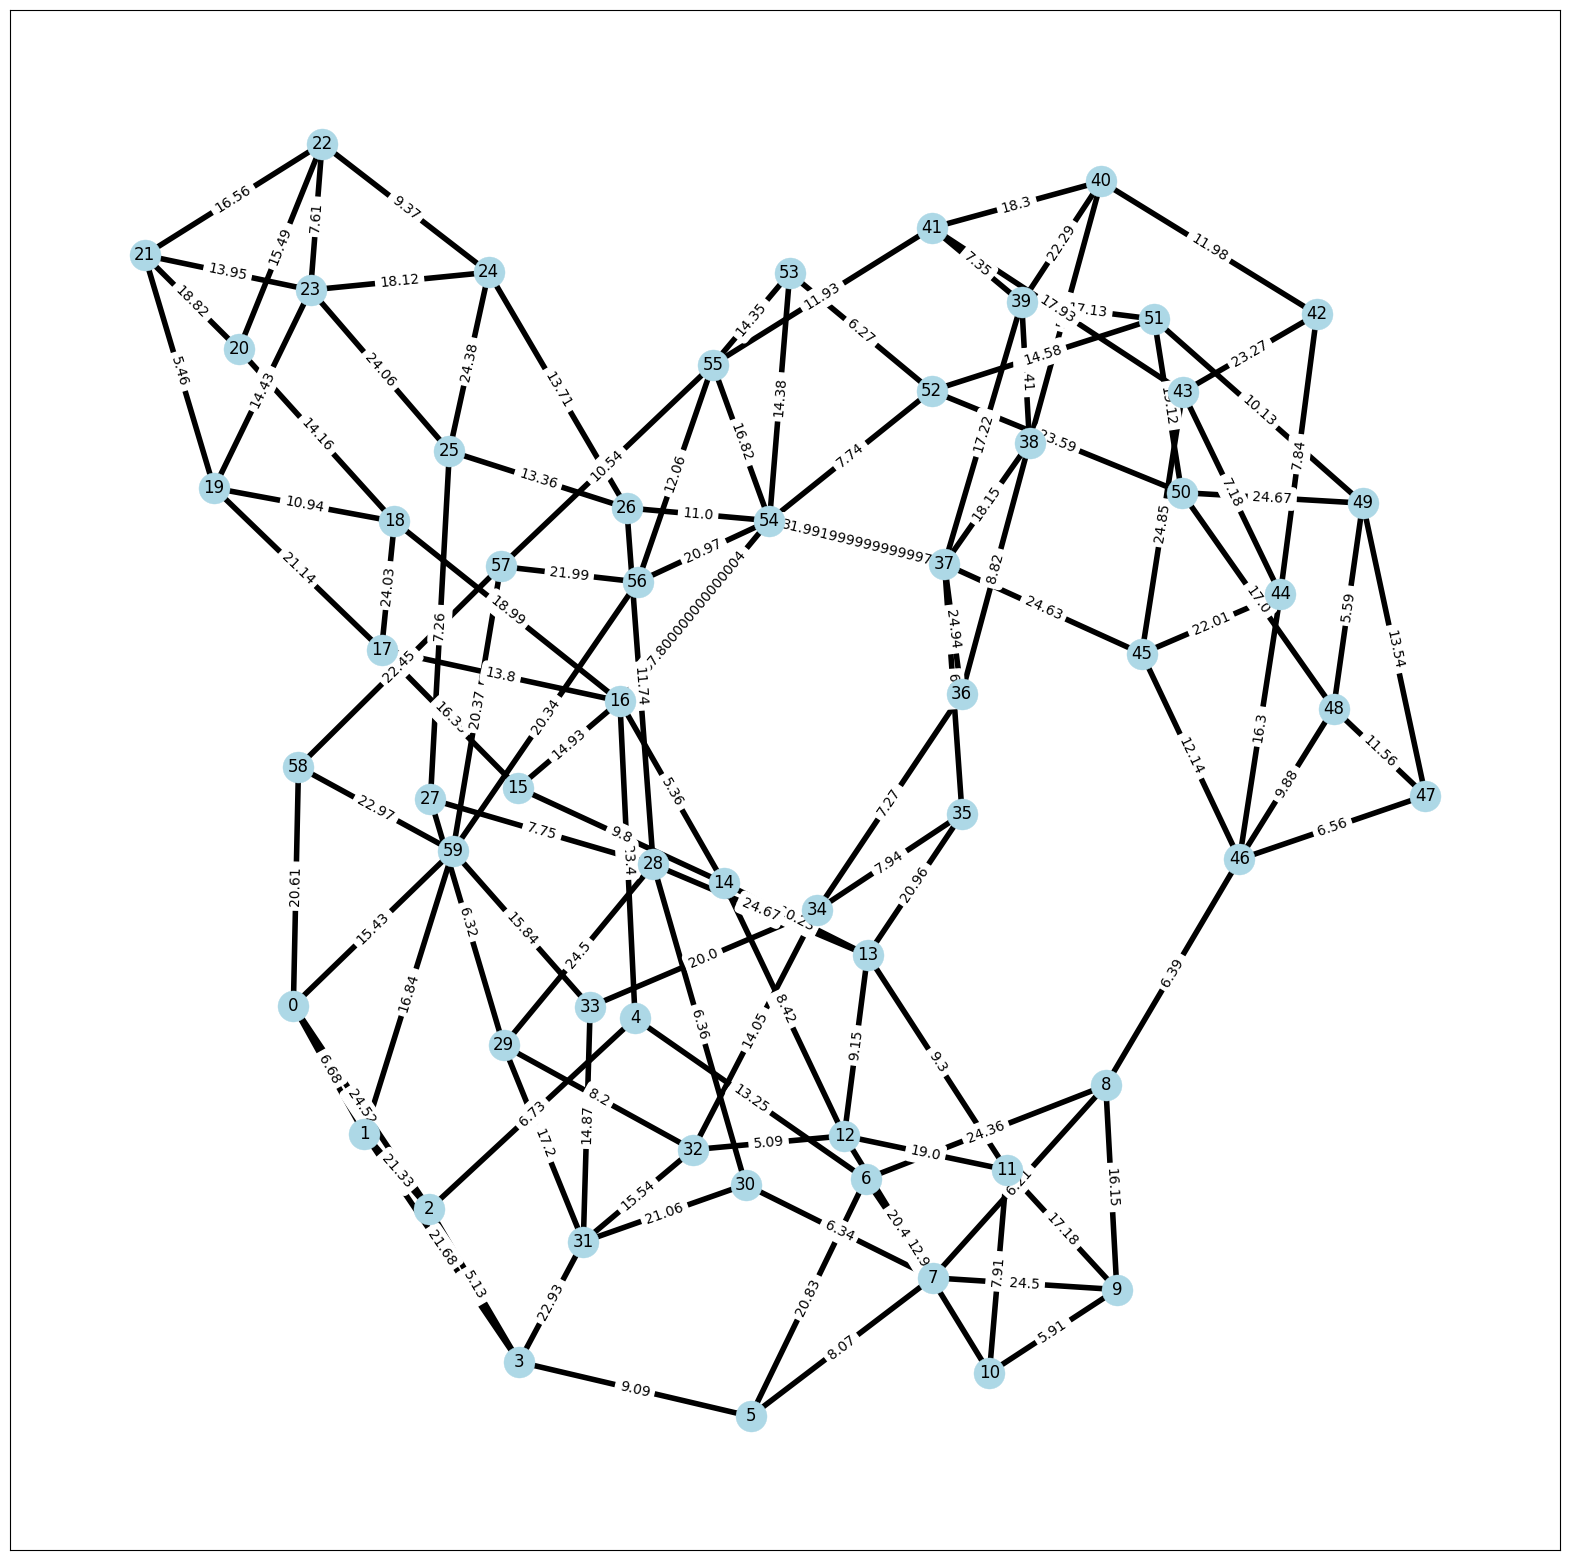

Recommendation - 3
{(13, 54): 54251910.9, (4, 35): 54195975.02, (13, 55): 54126278.21, (16, 46): 54047158.59, (4, 37): 53447809.39, (8, 18): 52437134.5, (4, 54): 52204048.97, (18, 46): 52101825.59, (2, 26): 51341821.08, (8, 16): 51306979.83, (1, 26): 51278661.15, (16, 55): 51140203.5, (13, 41): 50904275.46, (26, 37): 50760877.96, (16, 39): 50712668.32, (8, 54): 50621936.26, (46, 55): 50561391.3, (13, 26): 50429859.83, (16, 41): 50294048.26, (6, 54): 50234176.83, (2, 54): 50203203.23, (26, 59): 49758276.35, (16, 26): 49573750.7, (14, 26): 49563222.03, (6, 41): 48827179.43, (4, 41): 48798264.15, (6, 37): 48679895.12, (14, 46): 48610020.56, (16, 44): 48441911.68, (6, 26): 48413753.98, (4, 55): 48362807.26, (24, 37): 48112849.08, (26, 46): 47748020.89, (13, 59): 47652933.18, (8, 19): 47530788.94, (2, 41): 47477385.0, (4, 39): 47331927.7, (46, 54): 47212582.6, (4, 26): 47200630.16, (0, 54): 46843181.68, (4, 56): 46842145.86, (2, 55): 46807586.87, (9, 54): 46639802.4, (26, 39): 46632692.64, 

<ipython-input-4-352f26d5ea74>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='neato')


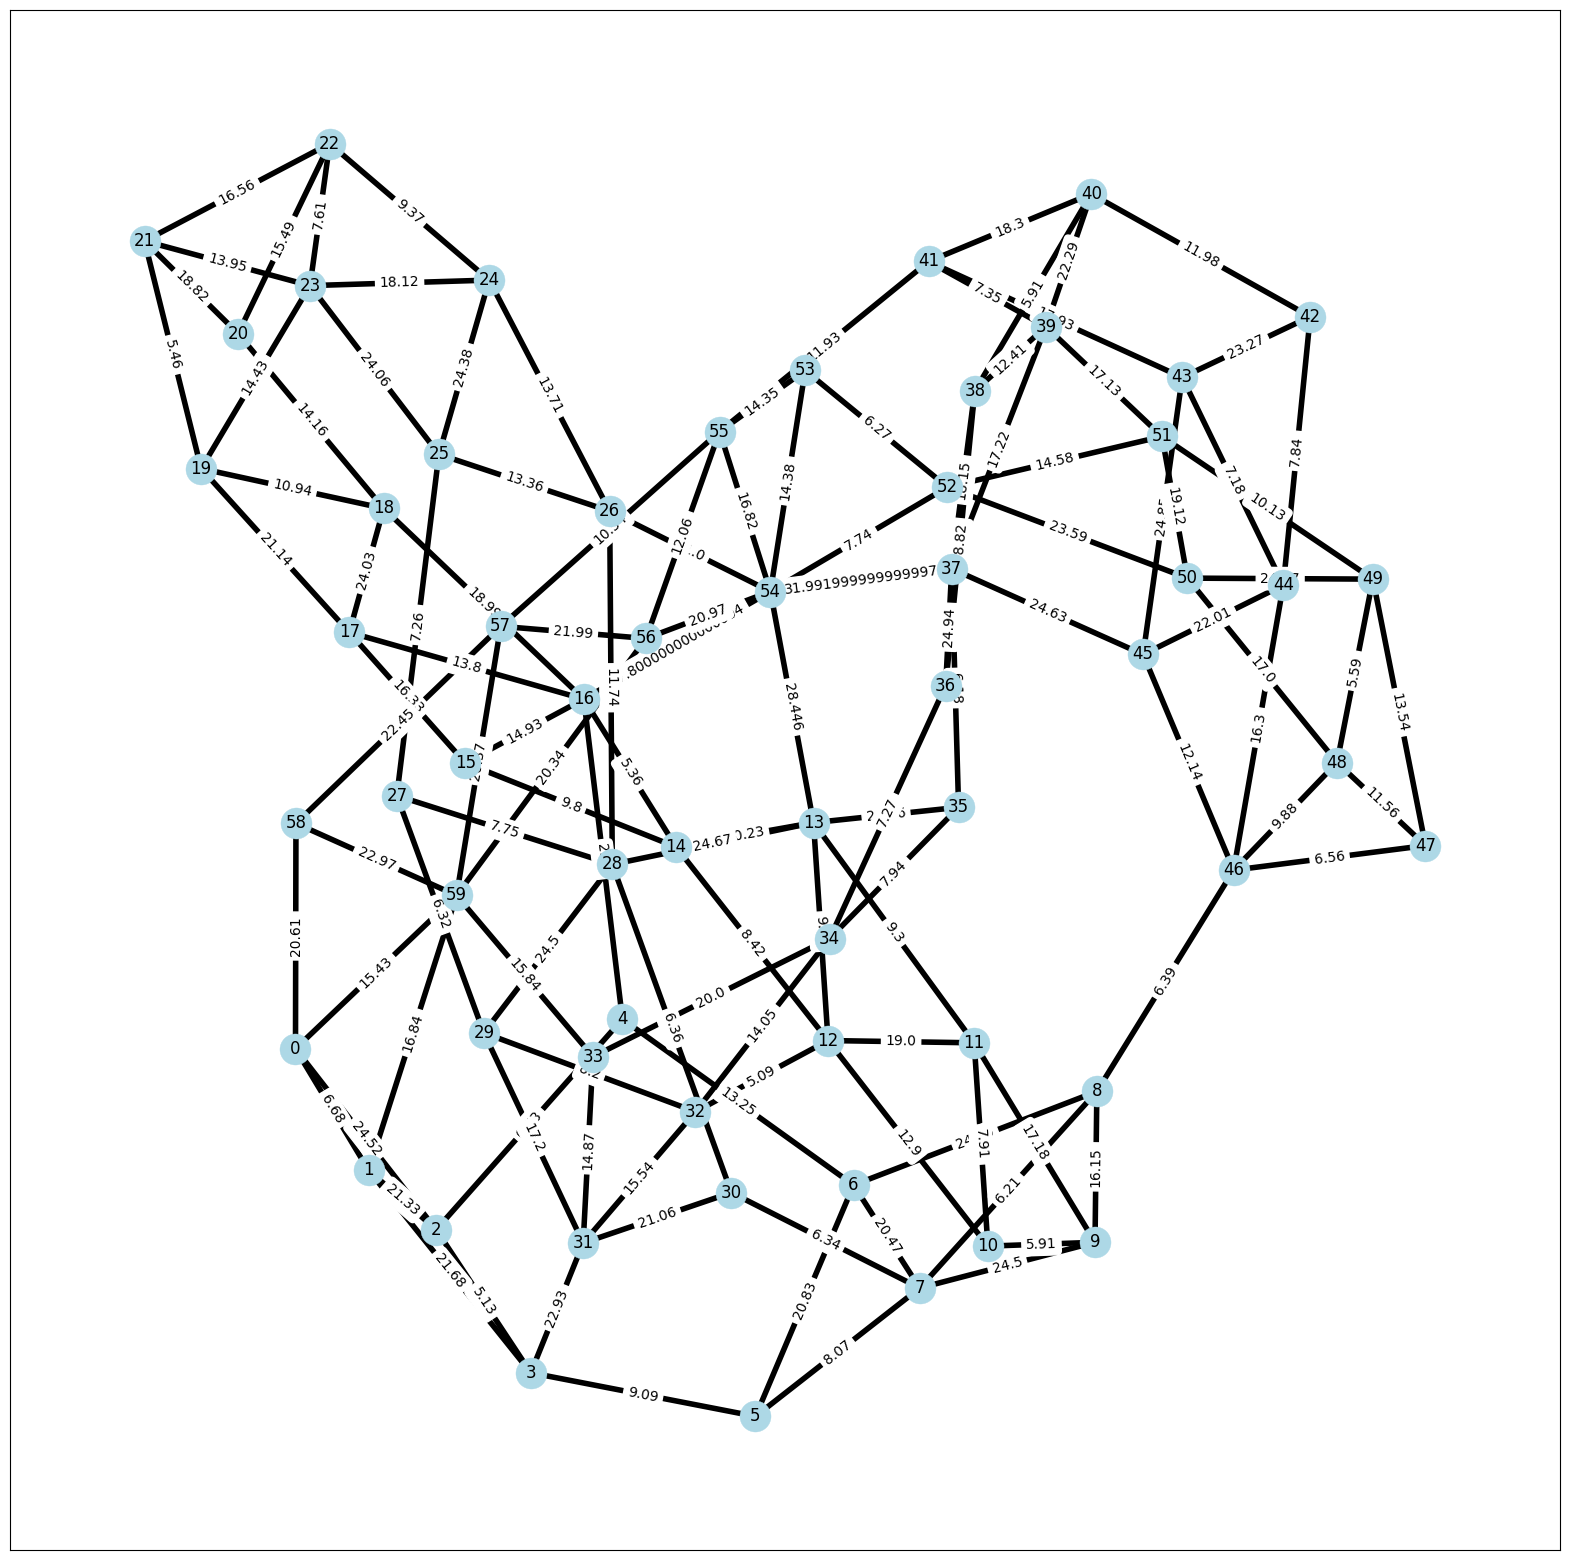

In [ ]:
# R5 - Start

connectivity = connectivity * 2
G2 = generate_random_node(60, connectivity)
display_graph(G2)
f = 0.6

# Generate trips for G1
G2_trips = simulate_traffic(G2, 60, 100)
print(G2_trips)

# R5
divider("R5 - Roads to build")
roads_to_build = get_roads_to_build(G2)
print(f"The {len(roads_to_build)} road(s) has to be build")

divider("R5 - Recommended Roads")
k = 3
build_roads(60, k, f, G2, G2_trips)